In [31]:
import pandas as pd
import numpy as np
from statsmodels.regression.linear_model import OLS

In [2]:
df = pd.read_clipboard()

In [5]:
df.set_index('HouseID',inplace=True)

In [119]:
home_1 = {
    'name':'home_1',
    'period_1': '2013',
    'price_1': 100_000,
    'period_2': '2015',
    'price_2': 200_000,
    '2013': -1,
    '2014':0,
    '2015':1
    
}

home_2 = {
    'name':'home_2',
    'period_1': '2013',
    'price_1': 200_000,
    'period_2': '2014',
    'price_2': 300_000,
    '2013': -1,
    '2014':1,
    '2015':0
    
}

home_3 = {
    'name':'home_3',
    'period_1': '2014',
    'price_1': 400_000,
    'period_2': '2015',
    'price_2': 800_000,
    '2013': 0,
    '2014':-1,
    '2015':1
    
}

In [139]:
df = pd.DataFrame(data=[home_1, home_2, home_3], 
                  columns=['name',
                           'period_1','price_1',
                           'period_2','price_2',
                           '2013','2014','2015']).set_index(
'name')

In [140]:
prices = np.array([np.log(df['price_2']) - np.log(df['price_1'])]).reshape(-1,)

In [141]:
model = OLS(endog=prices, exog=df[['2014','2015']].values).fit()

In [158]:
print('\n'.join([str(x) for x in model.params]))

0.27031007207210894
0.8283022165959999


In [134]:
np.sqrt(1.747)

1.3217412757419662

In [188]:
df.Price_1 = df['Price_1'].str.replace(',','').astype(int)
df.Price_2 = df['Price_2'].str.replace(',','').astype(int)

In [189]:
df['diff_log_prices'] = np.log(df['Price_1']) - np.log(df['Price_2'])

In [190]:
df.to_pickle('repeat_sales_data.pickle')

In [249]:
sales_indicators = df.drop(['HouseID',
                            'Date_1','Price_1','Quarter_1',
                            'Date_2','Price_2','Quarter_2',
                            'diff_log_prices','Q1'],axis=1)

In [250]:
diff_log_prices = df['diff_log_prices']

In [251]:
fit = OLS(endog=diff_log_prices, exog=sales_indicators).fit()

In [252]:
price_index = np.exp(fit.params)

In [253]:
dates = pd.Series(['Jan-90 to Mar-90', 'Apr-90 to Jun-90', 'Jul-90 to Sep-90', 'Oct-90 to Dec-90', 'Jan-91 to Mar-91', 'Apr-91 to Jun-91', 'Jul-91 to Sep-91', 'Oct-91 to Dec-91', 'Jan-92 to Mar-92', 'Apr-92 to Jun-92', 'Jul-92 to Sep-92', 'Oct-92 to Dec-92', 'Jan-93 to Mar-93', 'Apr-93 to Jun-93', 'Jul-93 to Sep-93', 'Oct-93 to Dec-93', 'Jan-94 to Mar-94', 'Apr-94 to Jun-94', 'Jul-94 to Sep-94', 'Oct-94 to Dec-94', 'Jan-95 to Mar-95', 'Apr-95 to Jun-95', 'Jul-95 to Sep-95', 'Oct-95 to Dec-95', 'Jan-96 to Mar-96', 'Apr-96 to Jun-96', 'Jul-96 to Sep-96', 'Oct-96 to Dec-96', 'Jan-97 to Mar-97', 'Apr-97 to Jun-97', 'Jul-97 to Sep-97', 'Oct-97 to Dec-97', 'Jan-98 to Mar-98', 'Apr-98 to Jun-98', 'Jul-98 to Sep-98', 'Oct-98 to Dec-98', 'Jan-99 to Mar-99', 'Apr-99 to Jun-99', 'Jul-99 to Sep-99', 'Oct-99 to Dec-99', 'Jan-00 to Mar-00', 'Apr-00 to Jun-00', 'Jul-00 to Sep-00', 'Oct-00 to Dec-00', 'Jan-01 to Mar-01', 'Apr-01 to Jun-01', 'Jul-01 to Sep-01', 'Oct-01 to Dec-01', 'Jan-02 to Mar-02', 'Apr-02 to Jun-02', 'Jul-02 to Sep-02', 'Oct-02 to Dec-02', 'Jan-03 to Mar-03', 'Apr-03 to Jun-03', 'Jul-03 to Sep-03', 'Oct-03 to Dec-03', 'Jan-04 to Mar-04', 'Apr-04 to Jun-04', 'Jul-04 to Sep-04', 'Oct-04 to Dec-04', 'Jan-05 to Mar-05', 'Apr-05 to Jun-05', 'Jul-05 to Sep-05', 'Oct-05 to Dec-05', 'Jan-06 to Mar-06', 'Apr-06 to Jun-06', 'Jul-06 to Sep-06', 'Oct-06 to Dec-06', 'Jan-07 to Mar-07', 'Apr-07 to Jun-07', 'Jul-07 to Sep-07', 'Oct-07 to Dec-07', 'Jan-08 to Mar-08', 'Apr-08 to Jun-08', 'Jul-08 to Sep-08', 'Oct-08 to Dec-08', 'Jan-09 to Mar-09', 'Apr-09 to Jun-09', 'Jul-09 to Sep-09', 'Oct-09 to Dec-09', 'Jan-10 to Mar-10', 'Apr-10 to Jun-10', 'Jul-10 to Sep-10', 'Oct-10 to Dec-10', 'Jan-11 to Mar-11', 'Apr-11 to Jun-11', 'Jul-11 to Sep-11', 'Oct-11 to Dec-11', 'Jan-12 to Mar-12', 'Apr-12 to Jun-12', 'Jul-12 to Sep-12', 'Oct-12 to Dec-12', 'Jan-13 to Mar-13', 'Apr-13 to Jun-13', 'Jul-13 to Sep-13', 'Oct-13 to Dec-13', 'Jan-14 to Mar-14', 'Apr-14 to Jun-14', 'Jul-14 to Sep-14', 'Oct-14 to Dec-14', 'Jan-15 to Mar-15', 'Apr-15 to Jun-15', 'Jul-15 to Sep-15', 'Oct-15 to Dec-15', 'Jan-16 to Mar-16', 'Apr-16 to Jun-16', 'Jul-16 to Sep-16', 'Oct-16 to Dec-16'])

In [262]:
index = pd.DataFrame(data=price_index,columns=['price_index'])
index['Period'] = dates

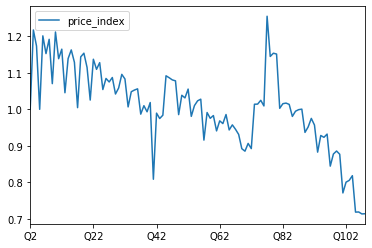

In [278]:
ax = index.plot(y='price_index')